In [ ]:
import matplotlib.pyplot as plt

#Calling numpy and pandas 
import pandas as pd
import numpy as np

#Calling matrix for model evaluation
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score,classification_report

#Callling traing split library
from sklearn.model_selection import train_test_split

#Importing ML algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Calling SMOTE library
import imblearn
#Importing hyperparameter
import xgboost as xgb
import lightgbm as lgb 
#Hyperparameter tuning Cross validation ML library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **`LOADING DATASETS`**
```



In [ ]:
data=pd.read_csv("/content/fraud_detection_bank_dataset.csv")


# **DATA EXPLORATION**

In [ ]:
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
data.shape


(20468, 114)

In [ ]:
no_fraud=data[(data["targets"]==0)]
fraud=data[data["targets"]==1]

In [ ]:
fraud.shape

(5438, 114)

In [ ]:
no_fraud.shape


(15030, 114)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.nunique().sum()

43797

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [ ]:
df=data.copy()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
def plot_roc_curve(y_test,prob):
  #Takes actual and predicted probablities as a input and plot receiver operating chracteritics 

  fpr, tpr, threshold=roc_curve(y_test, prob)
  plt.title("ROC curve plot")
  plt.plot(fpr,tpr, 'b', label="curve measure")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  plt.show()

# **Implemented model performance score function**

In [ ]:
def model_evaluation(test, pred):
  print("model accuracy: \n", accuracy_score(test, pred))
  print("Confusion metrix: \n", confusion_matrix(test, pred))
  print("classification report: \n", classification_report(test,pred))

# **With out sampling of imblance data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
#Initializing KNeighbors object
kns=KNeighborsClassifier(n_neighbors=20)

#Training the train data
kns.fit(X_train,np.ravel(y_train))
#Getting prediction value
pred=kns.predict(X_test)

In [ ]:
model_evaluation(y_test,pred)

model accuracy: 
 0.9878835255032246
Confusion metrix: 
 [[3801    0]
 [  62 1254]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3801
           1       1.00      0.95      0.98      1316

    accuracy                           0.99      5117
   macro avg       0.99      0.98      0.98      5117
weighted avg       0.99      0.99      0.99      5117



In [ ]:
kns_prob=kns.predict_proba(X_test)[:,1]

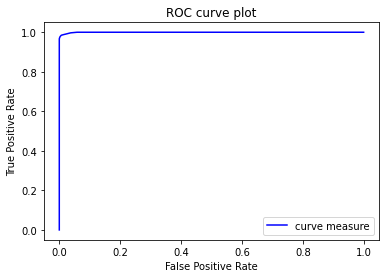

In [ ]:
plot_roc_curve(y_test,kns_prob)

# **Applying SMOTE over sampling**

In [ ]:
over_smpl=imblearn.over_sampling.SMOTE()

In [ ]:
X_res, y_res=over_smpl.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res)

In [ ]:
kn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
kn.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=kn.predict(X_test)

In [ ]:
model_evaluation(y_test,y_pred)

model accuracy: 
 0.9916167664670659
Confusion metrix: 
 [[3750   14]
 [  49 3702]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3764
           1       1.00      0.99      0.99      3751

    accuracy                           0.99      7515
   macro avg       0.99      0.99      0.99      7515
weighted avg       0.99      0.99      0.99      7515



# **After doing over sampling on imblance data, we got better performance to 99%**

In [ ]:
y_predroc=kn.predict_proba(X_test)[:,1]
y_predroc

array([1., 0., 0., ..., 1., 1., 1.])

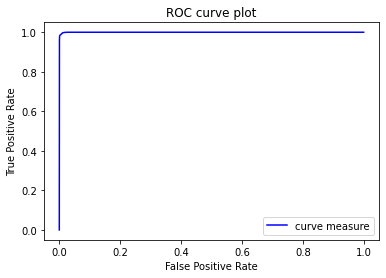

In [ ]:
plot_roc_curve(y_test,y_predroc)


# **Implementing DecisionTree classifier**

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=clf.predict(X_test)

In [ ]:
model_evaluation(y_test,pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3764    0]
 [   0 3751]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3764
           1       1.00      1.00      1.00      3751

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



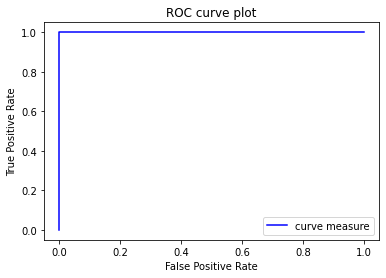

In [ ]:
plot_roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# **Applying RandomForestClassifier for fraud detection**

In [ ]:
rft=RandomForestClassifier(n_estimators=100)

In [ ]:
rft.fit(X_train, np.ravel(y_train))

RandomForestClassifier()

In [ ]:
y_pred=rft.predict(X_test)
y_roc_pred=rft.predict_proba(X_test)[:,1]

In [ ]:
model_evaluation(y_test, y_pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3764    0]
 [   0 3751]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3764
           1       1.00      1.00      1.00      3751

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



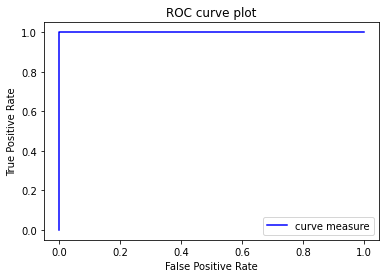

In [ ]:
plot_roc_curve(y_test,y_roc_pred)

# **GradientBosting implemention for fraud detection**

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10)

In [ ]:
gbc.fit(X_train,np.ravel(y_train))

GradientBoostingClassifier(learning_rate=1.0, max_depth=10)

In [ ]:
pred=gbc.predict(X_test)
roc_pred=gbc.predict_proba(X_test)[:,1]

In [ ]:
model_evaluation(y_test,pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3764    0]
 [   0 3751]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3764
           1       1.00      1.00      1.00      3751

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



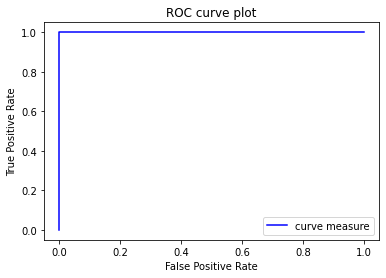

In [ ]:
plot_roc_curve(y_test,roc_pred)


# **Xgboost implementation to detect fraud**

In [ ]:
params={'learning_rate':[0.01, 0.1],
        'max_depth':[2,5],
        'min_child_weight':[1,3,5],
        'subsample':[.5, .7],
        'n_estimators':[100,150]}

In [ ]:
xgb_clf=xgb.XGBClassifier()

In [ ]:
gcv=GridSearchCV(estimator=xgb_clf, params_grid=params, cv=2, verbose=1)

TypeError: ignored

In [ ]:
gcv . fit(X_train,y_train)

NameError: ignored

In [ ]:
g_pred=gcv.predict(X_test)
g_roc_pred=gcv.predict_proba(X_test)[:,1]

In [ ]:
gcv.best_score_

In [ ]:
model_evaluation(y_test,g_pred)

In [ ]:
plot_roc_curve(y_test,g_roc_pred)

# **Applying lightgbm & Randomized Search for fraud detection**

In [ ]:
LGB=lgb.LGBMClassifier()

In [ ]:
rs_params = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550),
        'learning_rate': (0.01, 1.0)
}

In [ ]:
rs_cv=RandomizedSearchCV(estimator=LGB, param_distributions=rs_params, cv=2, n_jobs=-1, verbose=1)

In [ ]:
import re
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in X_train.columns}
new_n_list = list(new_names.values())
# [LightGBM] Feature appears more than one time.
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
X_train = X_train.rename(columns=new_names)

In [ ]:
rs_cv.fit(X_train,np.ravel(y_train))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'learning_rate': (0.01, 1.0),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)},
                   verbose=1)

In [ ]:
rs_pred=rs_cv.predict(X_test)
rs_roc_pred=rs_cv.predict_proba(X_test)[:,1]

In [ ]:
rs_cv.best_score_

In [ ]:
model_evaluation(y_test,rs_pred)


In [ ]:
plot_roc_curve(y_test,rs_roc_pred )

## **Bayes Search for Fraud Detection**

In [ ]:
bs_params={
       'max_depth':[4,6],
       'n_estimators':[50, 100],
       'learning_rate':[0.1, 0.2]
}

In [ ]:
#BayesSearch object 
bs=BayesSearchCV(LGB,
                 bs_params,
                 n_iter=5,
                 scoring='roc_auc',
                 cv=2,
                 refit=True,
                 verbose=1)